1. 럭키백 이벤트
2. 로지스틱 회귀
3. 다중 분류
4. 확률적 경사 하강법

---
학습목표
- 로지스틱 회귀
- 다중 분류
- 확률적 경사 하강법 

### 럭키백 이벤트
- 럭키백 : 구성품을 구매한 후에야 구성품이 뭔지 알 수 있는 상품
- 머신러닝으로 럭키백의 생선이 어떤 target에 속하는지 확률을 구함

- 7가지 생선 중 럭키백에 들어가 있는 생선의 확률을 구한다.
- 길이, 높이, 두께, 대각선 길이, 무게 등을 통해 7개 생선에 대한 확률을 구한다. 

- 알고리즘 : k-최근접 이웃은 주변 이웃을 찾아주니까 이웃의 클래스 비율을 확율이라고 출력한다. 
    - 샘플 x 주위에 가장 가까운 이웃 샘플 10개를 찾는다.
    - 사각형 3, 삼각형 5, 원 2
    - x가 사각형일 확률은 30%, 삼각형 50%, 원 20%

In [2]:
import pandas as pd
fish = pd.read_csv('fish_csv_data.csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
import pandas as pd

print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:
fish_target = fish['Species'].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=3)

In [11]:
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


### 다중 분류:multi class classification
- 타깃 데이터에 2개 이상의 클래스가 포함된 문제
- fish dataframe에서 7개의 생선이 있다.
- 타킷 데이터가 Species이기 때문에 훈련 세트와 테스트 세트의 타깃 데이터에도 7개의 생선 종류가 들어가 있다.

**타깃 지정**
- 이진 분류 사용할 때는 양성 클래스, 음성 클래스를 각각 0,1로 지정
- 다중 분류에서도 타깃값을 숫자로 바꾸어 입력
- sklearn에서는 문자열로 된 타깃값을 그대로 사용할 수 있다.
- 타깃값을 사이킷런 모델에 전달하면 순서가 알파벳 순서가 된다.
- pd.unique() 함수로 출력했던 순서와는 다르다. 
- KNeighborsClassifier에서 정렬된 타깃값은 classes_ 속성에 저장된다. 

In [12]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [13]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


### 확률값 확인
- sklearn 분류 모델은 predict_proba() 메서드로 클래스별 확률값을 반환한다.
- 테스트 세트에 있는 처음 5개의 샘플에 대한 확률을 출력한다.
- 넘파이 round() 함수는 소수점 첫째 자리에서 반올림(default), decimals 매개변수로 유지할 소수점 아래 자릿수 지정 가능
- predict_proba() 메서드 출력 순서 = classes_ 속성과 같다.

In [14]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


### 가장 가까운 이웃의 비율
- 계산한 확률이 가장 가까운 이웃의 비율 확인
- 네 번째 샘플의 최근접 이웃의 클래스를 확인
- kneighbors 메서드의 입력은 2차원 배열이어야 한다.
- numpy 배열의 slicing 연산자 사용
- 슬라이싱 연산자는 하나의 샘플만 선택해도(ex: test_target[4:5]) 항상 2차원 배열이 만들어진다. 

In [17]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])
# 4번째 샘플 선택

[['Roach' 'Perch' 'Perch']]


### 로지스틱 회귀(logistic regression)
- 회귀라고 하지만 분류 모델이다.
- 선형 회귀와 동일하게 선형 방정식을 학습한다.

- 시그모이드 함수
  - z 값이 확률이 되려면 0~1 사이 값을 가져야 한다.
  - z 값이 아주 큰 음수일 때 0, 아주 큰 양수일 때 1이 된다.
  - 함수의 출력 > 0.5 - 양성 클래스
  - 함수의 출력 <= 0.5 - 음성 클래스(sklearn)

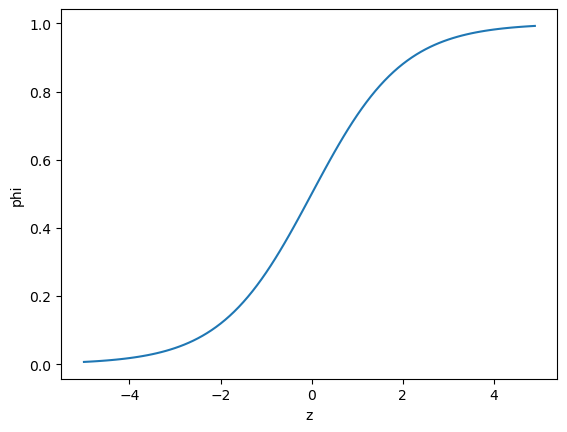

In [22]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1+ np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [25]:
import numpy as np

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [27]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [28]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [29]:
print(lr.classes_)

['Bream' 'Smelt']


In [30]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [31]:
fish.head(5)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [33]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)
# z 값 계산 - logistic regression 모델로 z 값 계산할 때는 decision_function() 함수로 z 값 출력할 수 있다.

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [35]:
# 이 z 값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다. 
# scipy 라이브러리에도 시그모이드 함수 expit()이 있다.
# 양성 클래스에 대한 z 값을 반환한다. - decision_functino() 메서드
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중 분류 수행
- LogisticRegression 클래스를 사용해 7개의 생선을 분류
- 반복 횟수
  - max_iter 매개변수
  - LogisticRegression 클래스는 반복적인 알고리즘을 사용
  - 반복 횟수의 default = 100
  - 반복 횟수가 부족하다는 경고 발생할 수 있는데 충분하게 훈련할 수 있도록 max_iter를 1000으로 늘린다.
  
- 규제
  - LidgeRegression와 같이 계수의 제곱을 규제
  - **L2 규제**라고도 부른다.
  - C 매개변수 : Lidge 회귀에서는 alpha 매개변수가 커질수록 규제가 커진다.
    - C 값은 작을수록 규제가 커진다.
    - C 값 default = 1
    - 규제 완화하기 위해 20으로 늘린다. 

- 훈련

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000)

In [39]:
print(lr.score(train_scaled, train_target))

0.9327731092436975


In [40]:
print(lr.score(test_scaled, test_target))

0.925


In [41]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [43]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [44]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [46]:
print(lr.coef_.shape, lr.intercept_.shape)

# 다중 분류는 클래스마다 z 값을 하나씩 계산한다.
# 따라서 coef_배열의 행과 intercept_는 7개이다. 
# coef_ 배열의 열은 데이터가 5개의 특성을 사용하므로 5개이다.

(7, 5) (7,)


**확률 계산**
- 이진 분류는 시그모이드 함수를 사용하여 z 값을 0~1 사이의 값으로 변환한다.
- 다중 분류는 소프트맥스 함수를 사용하여 z 값을 확률로 변환한다.
---
시그모이드 함수(sigmoid function) : 하나의 선형 방정식의 출력값을 0~1 사이로 압축<br>
<br>
소프트맥스 함수(softmax function) 
- 여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전제 합이 1이 되도록 만듦
- 지수 함수를 사용하기 때문에 **정규화된 지수 함수**라고도 한다.
  - 7개의 z 값의 이름 : z1~z7
  - z1~z7을 이용해 wltn e^z1 ~ e^z7 계산, 모두 더해서 e_sum에 넣는다.
  - e^z1/e_sum = s1, --- ,s7
  - sum(s1~s7) = 1

In [48]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [52]:
from scipy.special import softmax

# axis=1로 지정하면 각 행에 대해(각 샘플) 소프트맥스를 계산한다.
# axis를 지정하지 않으면 배열 전체에 대한 소프트맥스를 계산한다
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 확률적 경사 하강법
훈련데이터가 조금씩 전달됨.
- 조금씩 전달된 새로운 데이터를 기존의 훈련 데이터에 계속 추가하여 모델을 매일 훈련하는 방법은 좋은 방법이다.
- 지속 가능한 방법은 아님.

- 해결 방안 : 새로운 데이터를 추가할 때 이전 데이터를 버린다. 
  - 훈련 데이터 크기를 일정하게 유지
  - 버리는 데이터에 다른 데이터에는 없는 중요한 생선 데이터가 포함돼 있어서는 안된다.
    - 앞선 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 배우는 방식을 점진적 학습, 온라인 학습이라고 한다. 
   
### 점진적 학습 알고리즘
확률적 경사 하강법
- 대표적인 점진적 학습 알고리즘
- 확률적 : '무작위', '랜덤하게' / 경사: '기울기' / 하강법 : '내려가는 방법'

**경사 하강법**<br>
경사가 가장 가파른 길 = 가장 빠른 길<br>
훈련 세트를 사용해 모델을 훈련하기 때문에 경사 하강법도 당연히 훈련 세트를 사용하여 가장 가파른 길을 찾아야 한다.<br>
전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 **랜덤**하게 골라 가장 가파른 길을 찾는다.<br>
랜덤하게 샘플을 선택하므로 천천히 내려가야 한다.

---
### epoch 
- 훈련 세트를 한 번 모두 사용하는 과정
- 모든 샘플을 다 사용하면 다시 처음부터 시작
- 훈련 세트에 모든 샘플을 다시 채워 넣는다.
- 다시 랜덤하게 하나의 샘플을 선택해 이어서 경사를 내려간다. 

### batch gradient descent; 배치 경사 하강법
- 한 번 경사로를 따라 이동하기 위해서 전체 샘플을 사용
- 전체 데이터를 사용하기 때문에 가장 안전적
- 전체 데이터 사용 시 그만한 컴퓨터 자원 이용
- 데이터 너무 많아서 한 번에 읽지 못하는 경우도 있을 수 있다. (ex : 신경망 알고리즘 > 확률적 경사 하강법이나 미니배치 경사 하강법 사용)

### mini batch gradient descent; 미니배치 경사 하강법
- 여려 개의 샘플을 사용해 경사 하강법을 수행하는 방식

## 확률적 경사 하강법
- Stochastic Gradient Descent
- 훈련 세트를 사용해 산 아래에 있는 최적의 장소로 조금씩 이동하는 알고리즘
- 훈련 데이터가 모두 준비돼 있지 않고 매일 업데이트 돼도 학습을 계속 이어갈 수 있다.
- 다시 산꼭대기에서부터 시작할 필요가 없다. 


---
1. 경사 하강법 : 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 방법
2. 경사 하강법 모델 훈련 : 내려오는 과정
3. 확률적 경사 하강법 : 훈련 세트에서 랜덤하게 하나의 샘플을 골라 만족할 위치에 도달할 때까지 계속 내려 간다.
---
### 손실 함수 : loss function
- 머신러닝 알고리즘이 얼마나 엉망인지 측정하는 기준
- 값이 작을수록 좋다.
- 어떤 값이 최솟값인지 모르기 때문에 만족할 만한 수준이라면 인정해야 한다.
- 이 값을 찾아 조금씩 이동하려면 확률적 경사 하강법이 잘 맞다.

분류에서 손실 = 정답을 못 맞히는 것<br>
- 경사면은 연속적
- 이진 분류 
- 4개의 샘플만 있다면 가능한 정확도는 0, 0.25, 0.5, 0.75, 1 다섯 가지 뿐이다. 이렇게 정확도가 듬성듬성하면 경사 하강법을 이용해 조금식 내려올 수 없다. 
- 손실함수는 미분이 가능해야 한다. 

### 로지스틱 손실 함수
- 음성 클래스이면 양성 클래스로 바꾼다. (ex: 음성 클래스 0.8 -> 양성 클래서 0.2)
- 예측 9 -> -0.9(손실 함수 값, 작은 손실)
- 예측 0.8(음성클래스) -> 0.2(양성클래스) -> -0.2(손실 함수 값, 높은 손실)
- log 함수를 적용
  - 예측 확률을 사용해 계산하면 연속적인 손실 함수를 얻을 수 있다.
  - 예측 확률에 로그 함수 적용하면 에측 확률의 범위는 0~1 사이인데, 로그 함수는 0~1 사이에서 음수가 되므로 최종 손실 값은 양수가 된다.
  - 로그 함수는 0에 가까울수록 아주 큰 음수가 되기 때문에 손실을 아주 크게 만들어 모델에 큰 영향을 미칠 수 있다. 
- 양성 클래스(target=1)일 때 손실은 -log(예측 확률)로 계산 > 확률이 1에서 멀어져 0에 가까울수록 손실은 아주 큰 양수
- 음성 클래스(target=0)일 때 손실은 -log(1-예측확률)로 계산 
- **이진 크로스엔트로피 손실 함수(binary cross-entropy loss function)이라고도 부른다. 

**크로스엔트로피 손실 함수: cross-entropy loss function)**
- 다중 분류에서 사용하는 손실 함수

In [53]:
import pandas as pd

fish = pd.read_csv('fish_csv_data.csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [54]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [55]:
fish_target = fish['Species'].to_numpy()

In [56]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(fish_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### SGDClassifier
- sklearn에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스
- SGDClassifier의 객체를 만들 때 2개의 매개변수를 지정
- loss는 손실 함수의 종류를 지정
  - loss='log_loss'로 지정하여 로지스틱 손실 함수를 지정
- max_iter는 수행할 에포크 횟수를 지정
  - 10으로 지정하여 전체 훈련 세트를 10회 반복 

In [59]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

C:\Users\82104\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [60]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8571428571428571
0.875


In [61]:
# partial_fit() 함수 : 모델을 이어서 훈련할 때 partial_fit() 함수를 사용
# SGDClassifier 객체를 만들지 않고 sc를 추가로 더 훈련할 수 있다.
sc.partial_fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [62]:
print(sc.score(train_scaled, train_target))

0.7394957983193278


In [63]:
print(sc.score(test_scaled, test_target))

0.725


### epoch 횟수 
- 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합, 과대적합 일어날 수 있다.
  - 에포크 횟수 적으면 훈련 세트와 테스트 세트에 잘 맞지 않는 과소적합된 모델일 가능성이 높다.
  - 에포크 횟수 많으면 훈련 세트에 너무 잘 맞아 테스트 세트에는 점수가 나쁜 과대적합된 모델일 가능성이 높다. 
  
- 훈련
  - fit() 메서드 사용하지 않고 partial_fit() 메서드 사용
  - 훈련 세트에 있는 젠체 클래스의 레이블은 partial_fit() 메서드에 전달해줘야 한다.
  - np.unique() 함수로 train_target에 있는 7개의 생선 목록을 만든다.
  - 에포크마다 훈련 트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트를 만든다. 
 

In [64]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)
train_score=[]
test_score=[]
classes = np.unique(train_target)

In [66]:
for _ in range(0,300): # _는 파이썬의 특별한 변수로 나중에 사용하지 않고 버리는 값을 넣어두는 용도로 사용한다. 
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

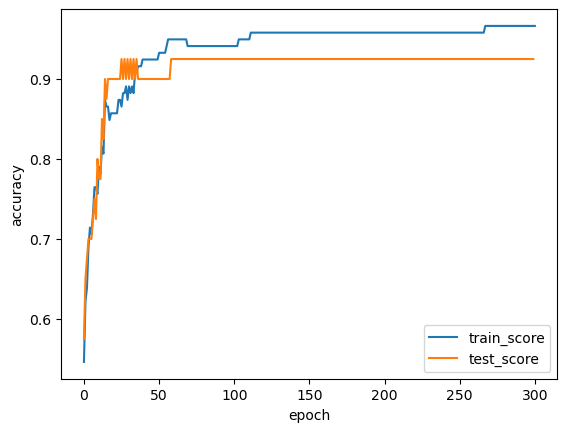

In [67]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_score', 'test_score'])
plt.show()

In [85]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

# tol 매개변수 : 값을 주면 성능 향상이 되면 몀춘다.
# tol=None으로 지정하면 멈추지 않고 설정한 max_iter=100만큼 무조건 반복한다. 

SGDClassifier(loss='log_loss', max_iter=100, random_state=42, tol=None)

In [86]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
